# Part 1: Loading and Preprocessing Text
##### Loaded and preprocessed the provided text data, converting it to
##### (i) lowercase, 
##### (ii) removing special characters
##### (iii) digits and 
##### (iv) redundant whitespace, 
##### (v) list of words and 
##### (vi) excluding meaningless words.

In [68]:
%matplotlib inline
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import wordcloud as wc
from textblob import TextBlob
from collections import Counter


df = pd.read_csv('AE1_vishing_data_zipped.csv.zip', 
                  engine='python')

In [324]:
STOPWORDS = ["i", "is", "a", "an", "and", "the", "on", "of", "in", "with", "you", "your",
             "me", "to", "rt", "bt", "at", "for"]

def clean_text(text):
    """
    Cleans a tweet text string by converting to lowercase, removing special characters,
    numbers, redundant whitespace, URLs, and stop words).

    Args:
        text (str): Original tweet text.
    Returns: 
        list of cleaned strings.
    """
    text = text.lower()
    text = re.sub(r'http\S+', '', text) #removes URLs
    text = re.sub(r'@\w+', '', text) #remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text) #keeps only alphabetical letters

    words = text.split()
    clean_words = [word for word in words if word not in STOPWORDS]
    
    return clean_words

In [326]:
df = df[df['lang'] == 'en'] #focusing on english tweets only
df = df.reset_index(drop=True)

df['cleaned_text'] = df['text'].apply(clean_text)

In [327]:
df.head(5)

,created_at,id,source,author_id,lang,text,cleaned_text
0,2019-04-01T10:12:52.000Z,21TUSlvC,Twitter for iPhone,PnsVIF3t,en,Is there any scam calls going round now where ...,"[there, any, scam, calls, going, round, now, w..."
1,2019-04-01T10:07:01.000Z,wF60bOz6,Twitter Web Client,ueO4OFLj,en,Yet another scam call allegedly from @bt_uk ab...,"[yet, another, scam, call, allegedly, from, ab..."
2,2019-04-01T10:03:31.000Z,2cCsG9XR,Twitter Web Client,8VnQJODk,en,Scam alert: Beware of scammers impersonating P...,"[scam, alert, beware, scammers, impersonating,..."
3,2019-04-01T10:03:04.000Z,NG6xD6BW,Buffer,oXd49QtC,en,"Do you know the difference between #Phishing, ...","[do, know, difference, between, phishing, vish..."
4,2019-04-01T09:56:57.000Z,ib5HnVln,Twitter for iPhone,WhCjY3aI,en,@frontpoint can you guys explain how it is tha...,"[can, guys, explain, how, it, that, cancelled,..."


In [347]:
#test
print(f'Uncleaned: {df['text'][4]}')
print(f'Cleaned: {df['cleaned_text'][4]}')

Uncleaned: @frontpoint can you guys explain how it is that I cancelled my services 3x yet you are still charging me. I can’t call and do this again. Everyone should know you are a scam
Cleaned: ['can', 'guys', 'explain', 'how', 'it', 'that', 'cancelled', 'my', 'services', 'x', 'yet', 'are', 'still', 'charging', 'cant', 'call', 'do', 'this', 'again', 'everyone', 'should', 'know', 'are', 'scam']


# Part 2: Analysing Text
##### Analysed the processed tweets posted by top ten frequent users by 
##### (i) counting the frequency of words,
##### (ii) determining the vocabulary richness 
##### (iii) identifying any common words between the users.

In [331]:
#identifying top ten most frequent users
top_users = df['author_id'].value_counts().nlargest(10)
top_user_ids = list(top_users.index)
print(top_user_ids)


#creating new dataframe to reduce calling the large main dataframe
df_top_users = df[df['author_id'].isin(top_user_ids)][['created_at', 'author_id', 'text', 'cleaned_text']]
df_top_users = df_top_users.reset_index(drop=True)

['Js52nhWF', '8vALwyFC', 'lBB5fznp', 'ibxoF7ek', '2XsS0PvX', 'ew1xCVya', 'AVqtlsOh', '3inC0kom', 'AIrDCdLj', 'u4iShEo6']


In [418]:
#frequency and common words
overall_word_counter = Counter()

for user_id in top_user_ids:
    user_tweets = df_top_users[df_top_users['author_id'] == user_id]['cleaned_text']
    
    all_words = []
    for tweet in user_tweets:
        all_words.extend(tweet) #combine all tweets from specific user
        
    word_counts = Counter(all_words)
    overall_word_counter.update(word_counts) #to keep track of common words between users

    print(f'Word frequency for user {user_id}:{word_counts.most_common(5)}') # prints top 5 words for each user
    unique_number_words = len(word_counts) #find
    total_number_words = sum(word_counts.values()) #add up total number

    vocab_richness = unique_number_words / total_number_words

    print(f'Vocabulary Richness for user {user_id}: {vocab_richness:.4f}')
    print(f'# of Unique Words: {unique_number_words}, Total # of Words: {total_number_words}\n')


top_common_words = overall_word_counter.most_common(10)
print('\n************\nMost Frequent Words Across Top 10 Users:', top_common_words) 

Word frequency for user Js52nhWF:[('scam', 3478), ('call', 2666), ('account', 1981), ('have', 1836), ('up', 1797)]
Vocabulary Richness for user Js52nhWF: 0.0242
# of Unique Words: 1437, Total # of Words: 59455

Word frequency for user 8vALwyFC:[('scam', 2582), ('call', 2158), ('hi', 2074), ('report', 2052), ('this', 2044)]
Vocabulary Richness for user 8vALwyFC: 0.0262
# of Unique Words: 1299, Total # of Words: 49650

Word frequency for user lBB5fznp:[('scam', 3919), ('fraud', 2308), ('call', 2159), ('phone', 960), ('from', 744)]
Vocabulary Richness for user lBB5fznp: 0.1191
# of Unique Words: 6890, Total # of Words: 57837

Word frequency for user ibxoF7ek:[('scam', 1721), ('call', 1721), ('there', 1701), ('okey', 1160), ('are', 1141)]
Vocabulary Richness for user ibxoF7ek: 0.0013
# of Unique Words: 33, Total # of Words: 25230

Word frequency for user 2XsS0PvX:[('vishing', 1397), ('scam', 544), ('phone', 427), ('scammers', 216), ('phishing', 187)]
Vocabulary Richness for user 2XsS0PvX: 

# Task 3: Visualising Data (20 Points)
##### Visualise the analysed data by 
##### (i) generating word clouds for top 10 users
##### (ii) compute the sentiment scores of those users and plot them overtime

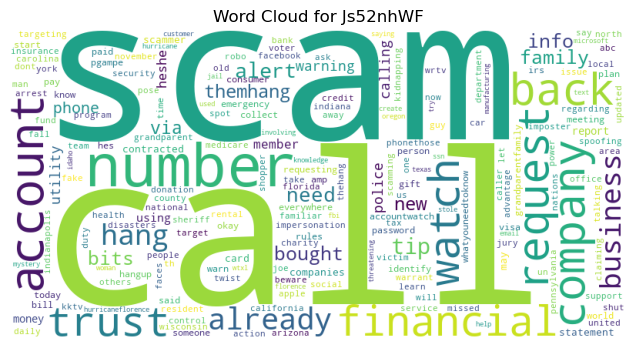

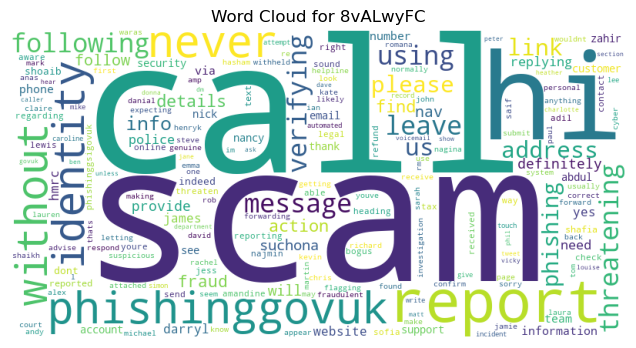

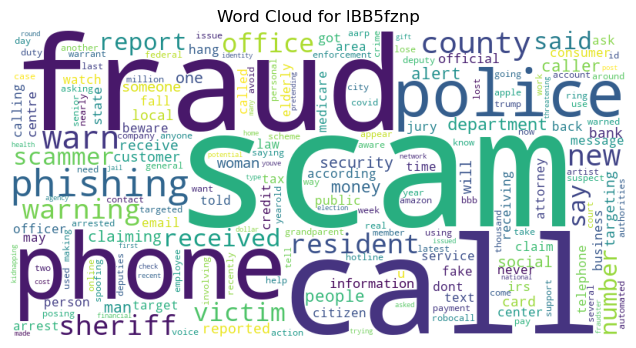

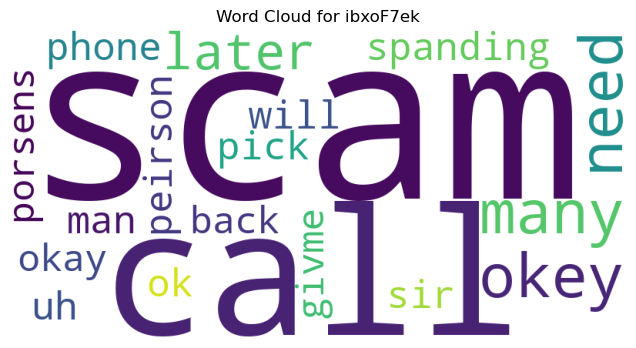

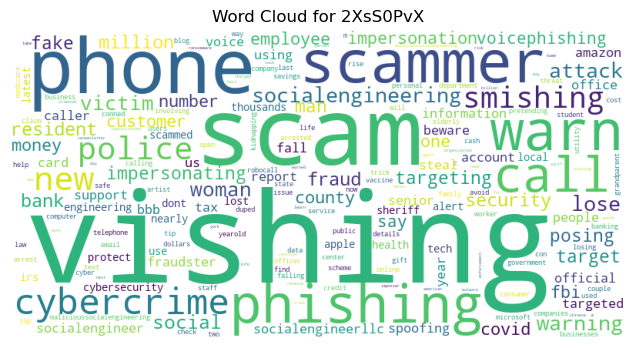

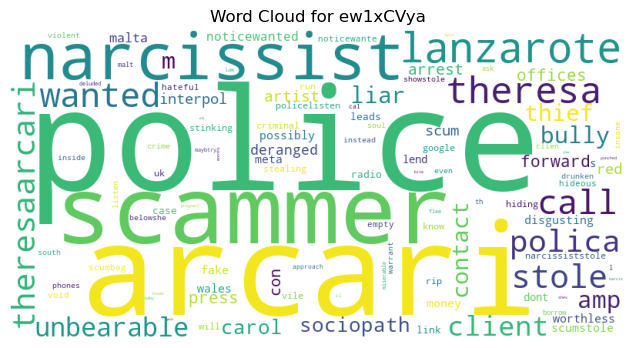

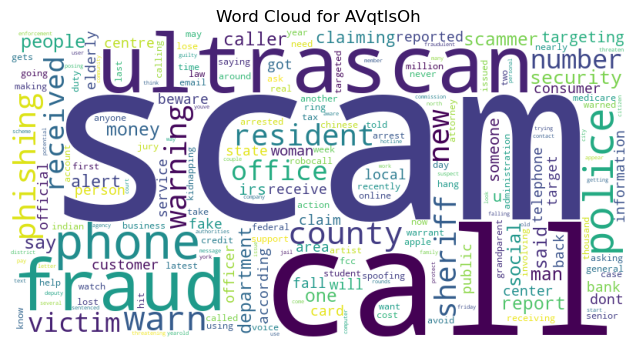

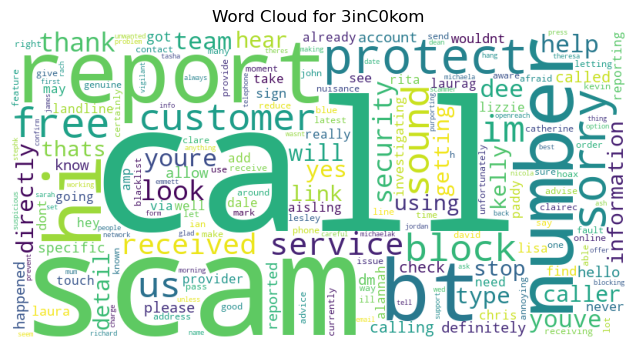

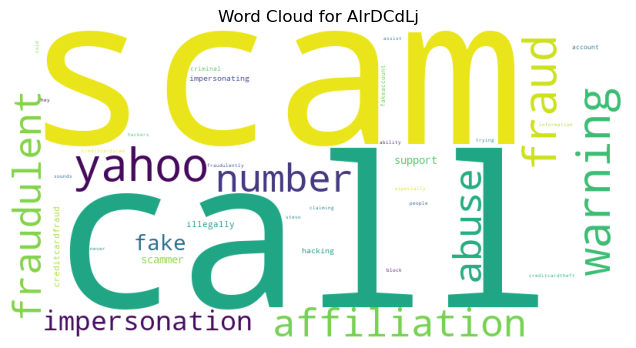

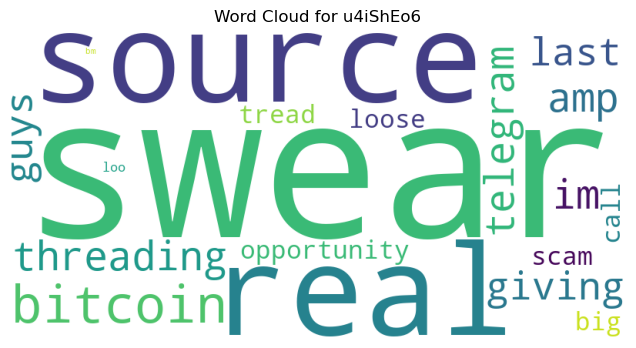

In [438]:
for user_id in top_user_ids:
    user_tweets = df_top_users[df_top_users['author_id'] == user_id]['cleaned_text'] #filters so only rows that match author_id are shown
    
 
    full_text = " ".join(word for tweet in user_tweets for word in tweet)

    wordcloud = wc.WordCloud(width=800, height=400, background_color='white', collocations=False).generate(full_text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Word Cloud for {user_id}')

    plt.show()

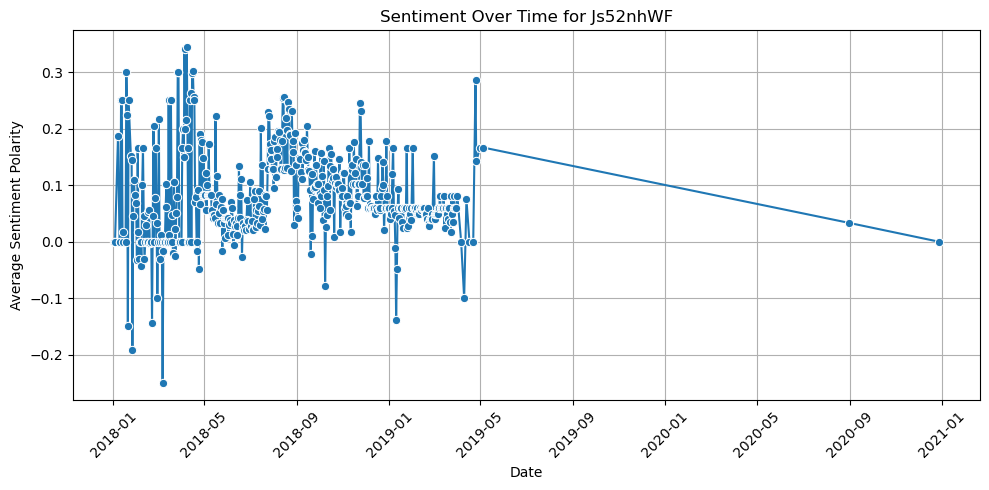

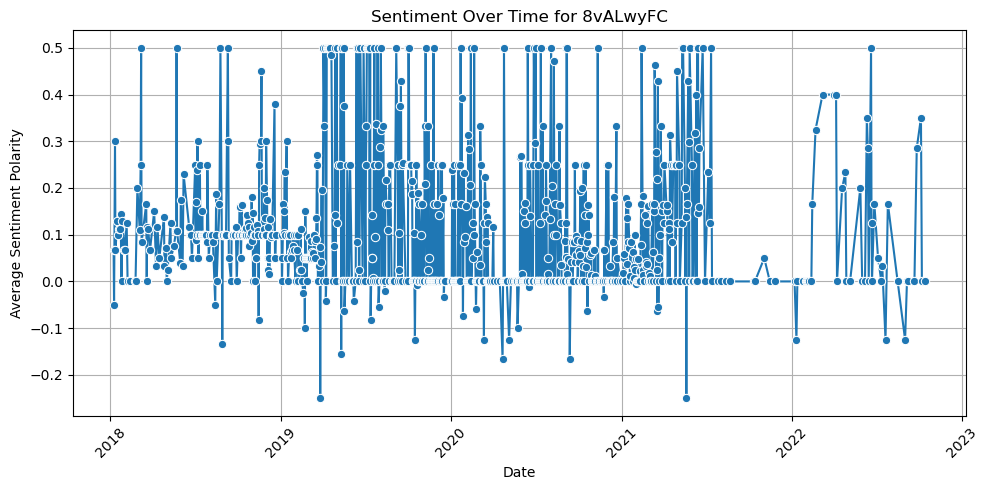

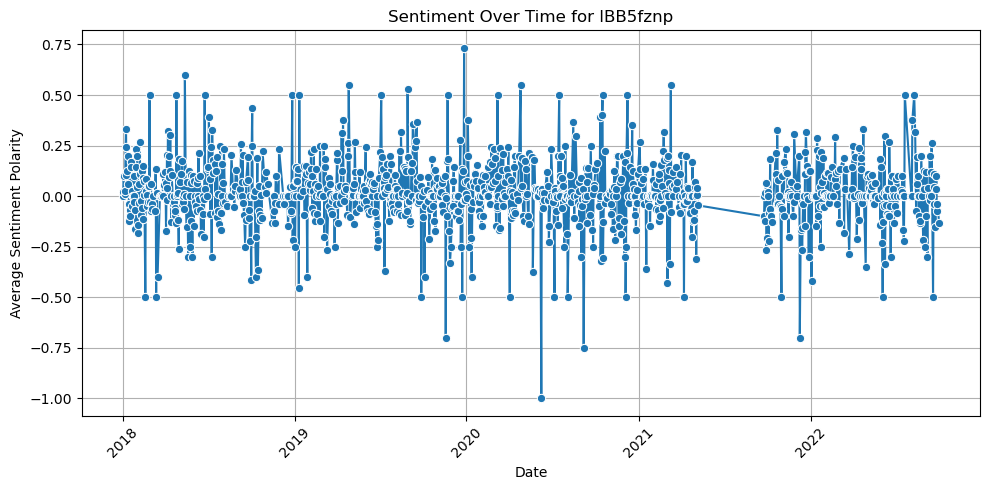

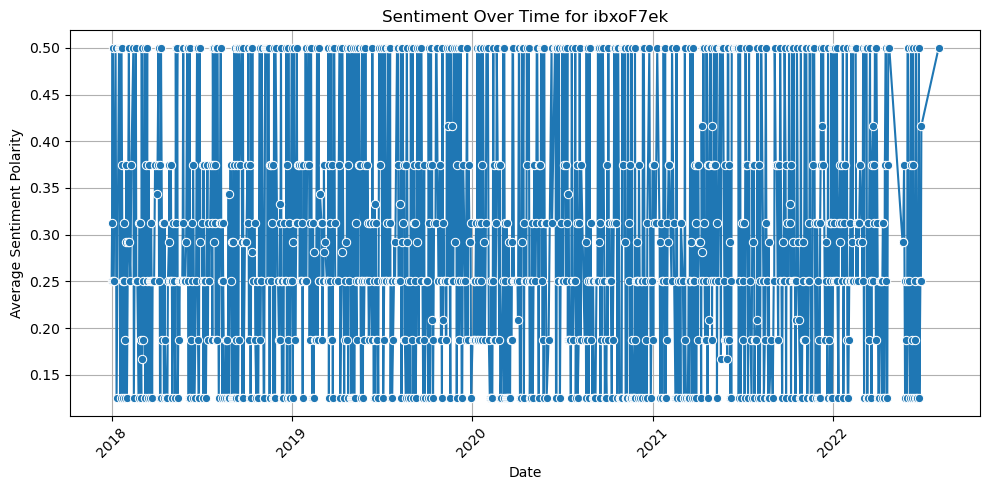

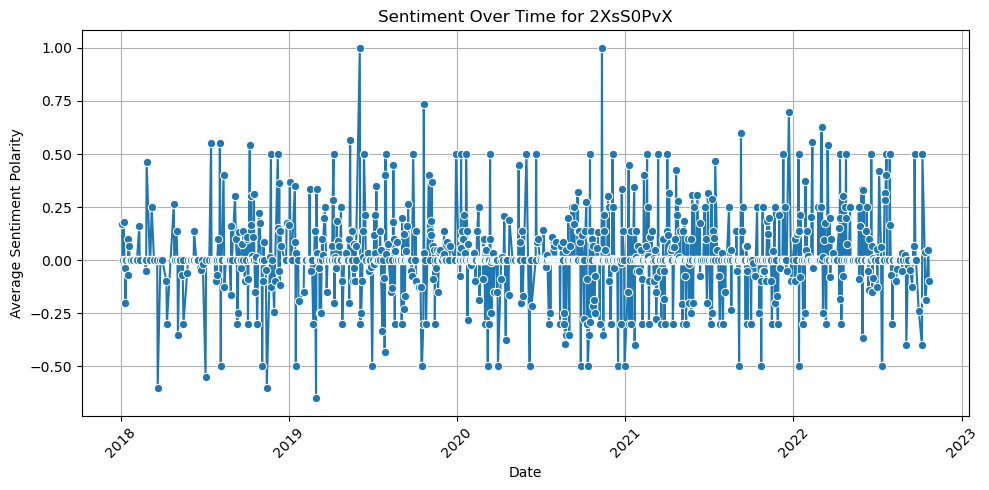

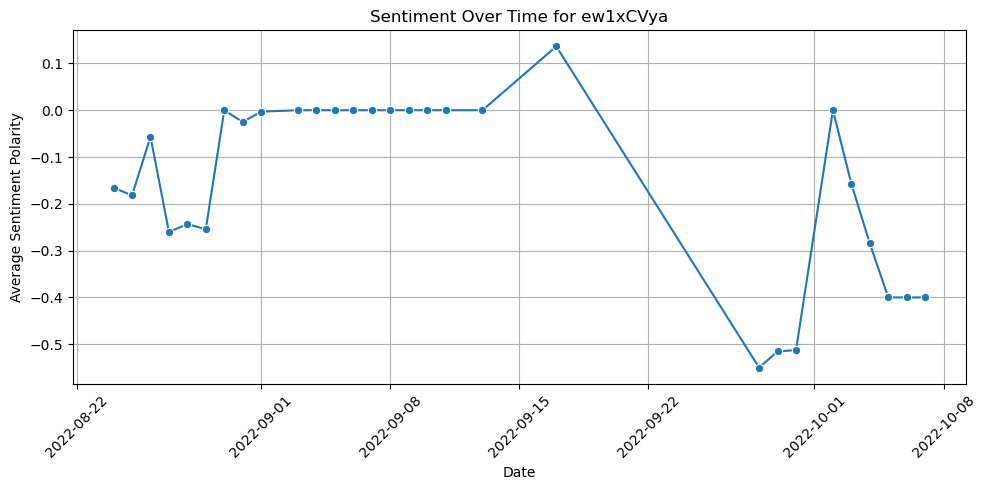

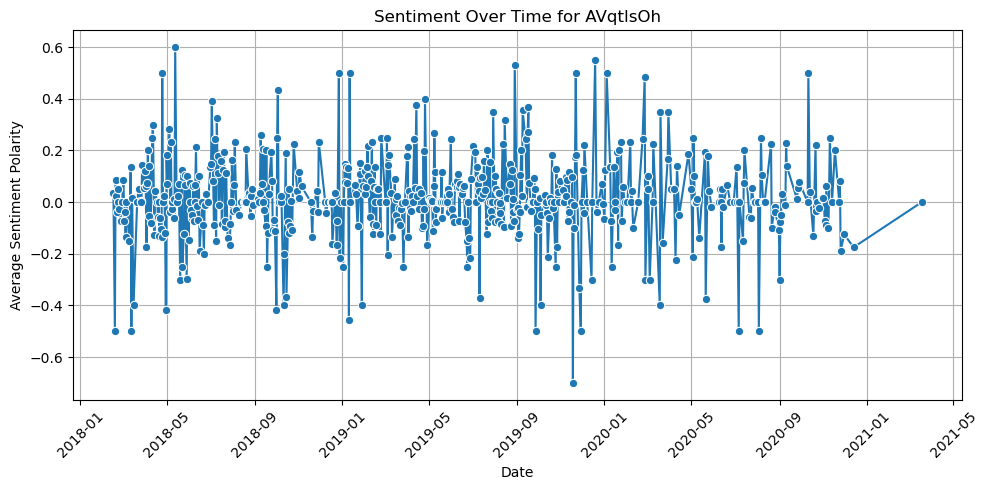

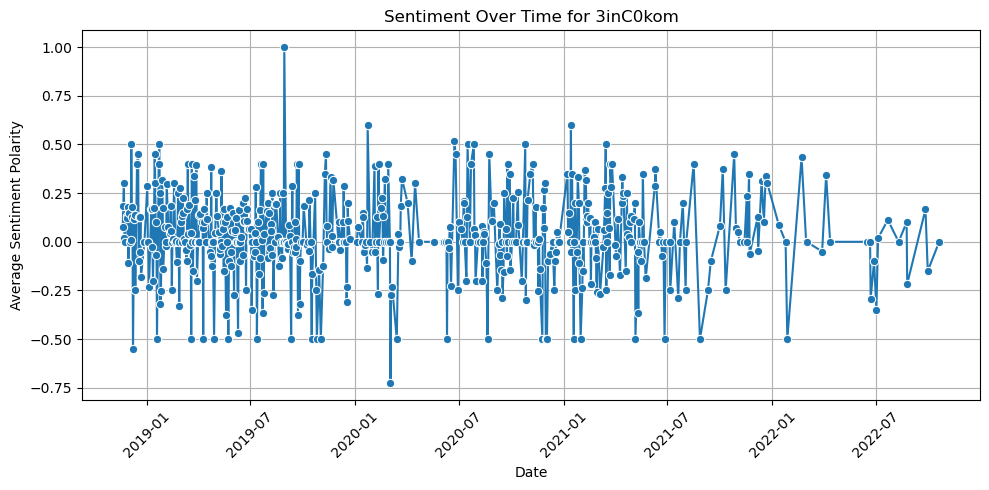

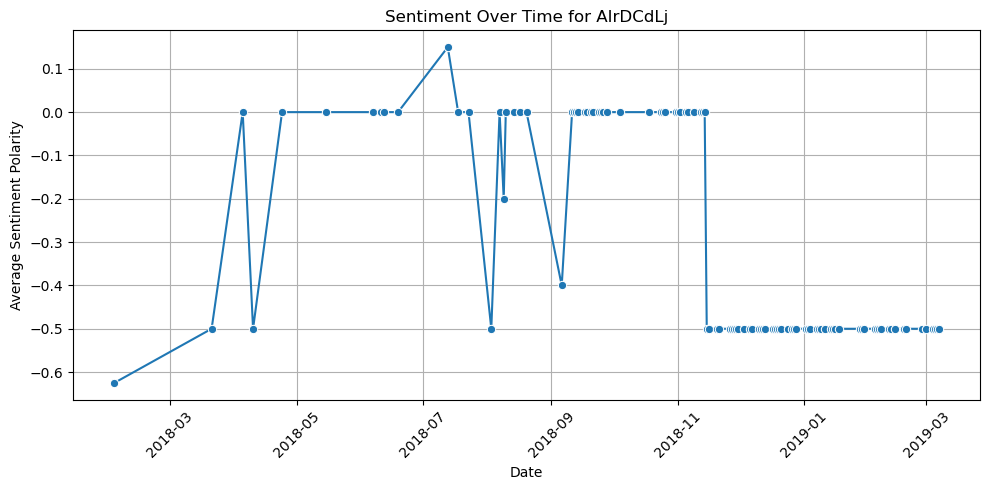

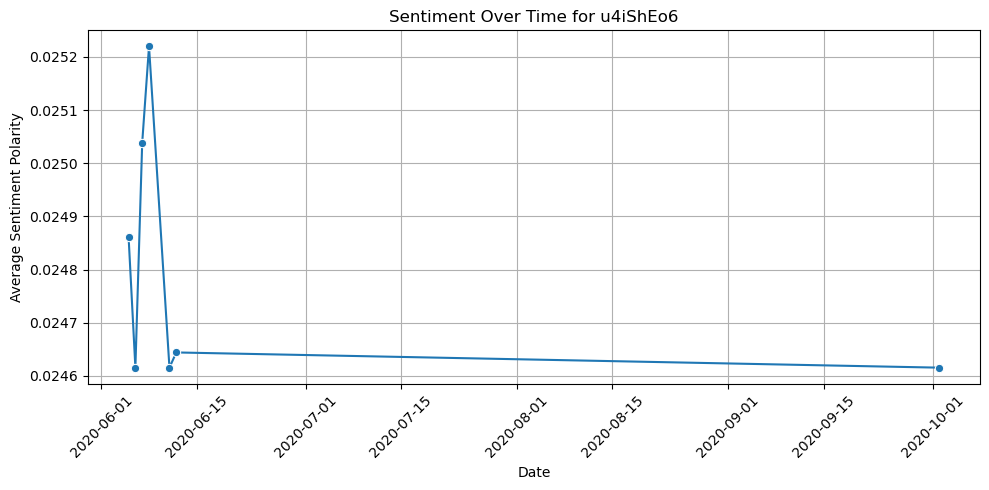

In [420]:
# sentiment scores plotted over time
df_top_users['created_at'] = pd.to_datetime(df_top_users['created_at']) #convert to date

df_top_users['date'] = df_top_users['created_at'].dt.date


def compute_sentiment(text):
    """
    Computes the sentiment polarity of the given text using TextBlob.
    
    Args:
        text (str): Tweet text.
        
    Returns:
        float: Sentiment polarity score.
    """
    return TextBlob(text).sentiment.polarity

df_top_users['polarity'] = df_top_users['text'].apply(compute_sentiment)

#grouping by user's id and date, to compute average sentiment
grouped = df_top_users.groupby(['author_id', 'date'])['polarity'].mean().reset_index()

for user_id in top_user_ids:
    user_data = grouped[grouped['author_id'] == user_id]
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=user_data, x='date', y='polarity', marker="o")
    
    plt.xlabel("Date")
    plt.ylabel("Average Sentiment Polarity")
    plt.title(f"Sentiment Over Time for {user_id}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    plt.show()

# Visualising N-grams
##### Created n-grams (till quad-gram), identified top 5 n-grams for each category, and created
##### a normalised time-series visualisation by dividing the number of posts (tweets
##### containing those n-grams) by number of users.


In [444]:
def reclean_text(text):
    """Removes apostrophes, brackets, and unwanted characters from text."""
    text = re.sub(r"['\[\]\(\)\,]", "", text)  # removes apostrophes, commas, square, and round brackets
    text = re.sub(r"\s+", " ", text).strip()  # redundant white spaces
    return text
    
def ngrams_generator(df_clean_text, n):
    """Generate n-grams from list-based text column
     Parameters:
        df_clean_text (pd.Series): A Pandas Series containing cleaned text.
        n (int): The number of tokens per n-gram.
    
    Returns:
        list of ngram strings.
    """
    joined_text = " ".join(df_clean_text.dropna().astype(str).apply(reclean_text)) #guarantee conversion to string
    split_words = joined_text.split()
    ngrams = zip(*[split_words[i:] for i in range(n)])

    return [' '.join(ngram) for ngram in ngrams]

#generate and analyze n-grams
n_values = [1, 2, 3, 4]

ngram_counts = {}
for n in n_values:
    ngrams = ngrams_generator(df['cleaned_text'], n)
    ngram_counts[n] = Counter(ngrams).most_common(5)

for n in n_values:
    print(f"Top {n}-grams:")
   
    for phrase, count in ngram_counts[n]:
        print(f"  {phrase}: {count}")
    print() #formatting purposes

Top 1-grams:
  call: 1101965
  scam: 933219
  this: 306073
  from: 301007
  it: 284454

Top 2-grams:
  scam call: 110065
  call from: 106157
  phone call: 66357
  call it: 62800
  dont call: 53987

Top 3-grams:
  closure scam dont: 39174
  call just move: 36462
  dont call just: 36453
  text dont call: 36450
  scam dont text: 36381

Top 4-grams:
  dont call just move: 36423
  text dont call just: 36413
  closure scam dont text: 36366
  scam dont text dont: 36347
  dont text dont call: 36333



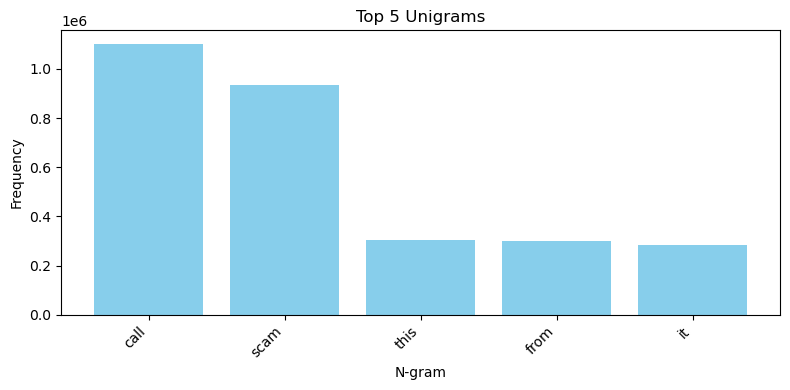

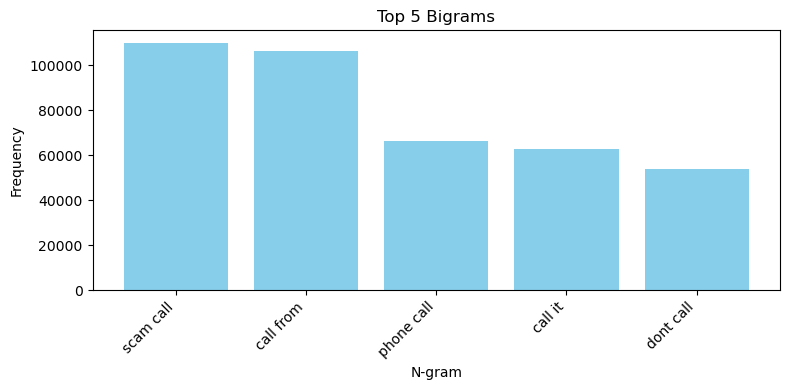

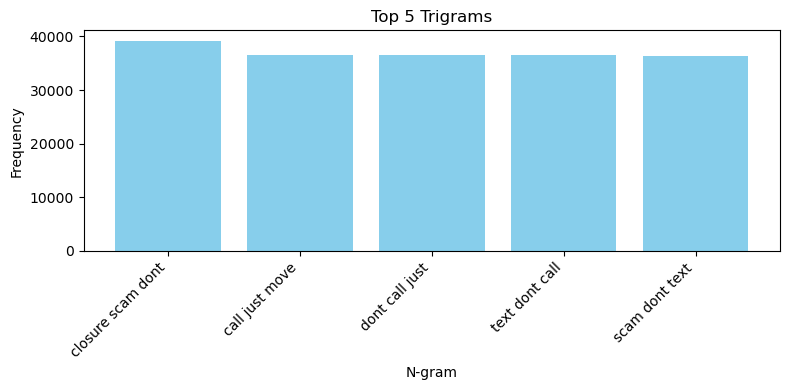

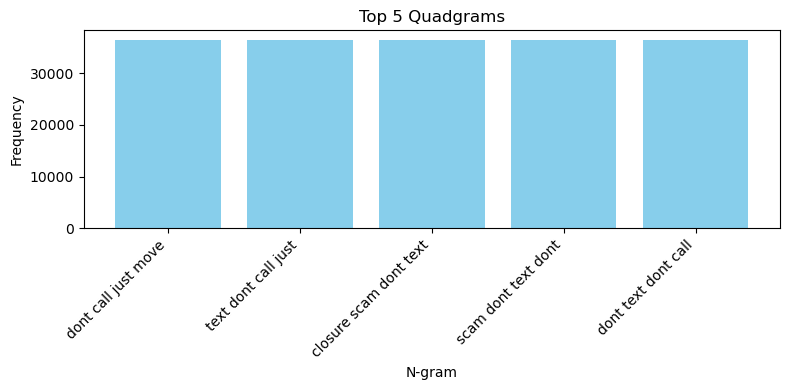

In [446]:
#plotting visual bar graph for top ngrams

def plot_top_ngrams(ngram_counts, title):
    """Plots the top ngrams."""
    if not ngram_counts:
        print(f"No data to plot for {title}.")
        return
    
    ngrams, counts = zip(*ngram_counts)
    plt.figure(figsize=(8, 4))
    plt.bar(ngrams, counts, color="skyblue")
    plt.title(title)
    plt.xlabel("N-gram")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

plot_top_ngrams(ngram_counts[1], "Top 5 Unigrams")
plot_top_ngrams(ngram_counts[2], "Top 5 Bigrams")
plot_top_ngrams(ngram_counts[3], "Top 5 Trigrams")
plot_top_ngrams(ngram_counts[4], "Top 5 Quadgrams")


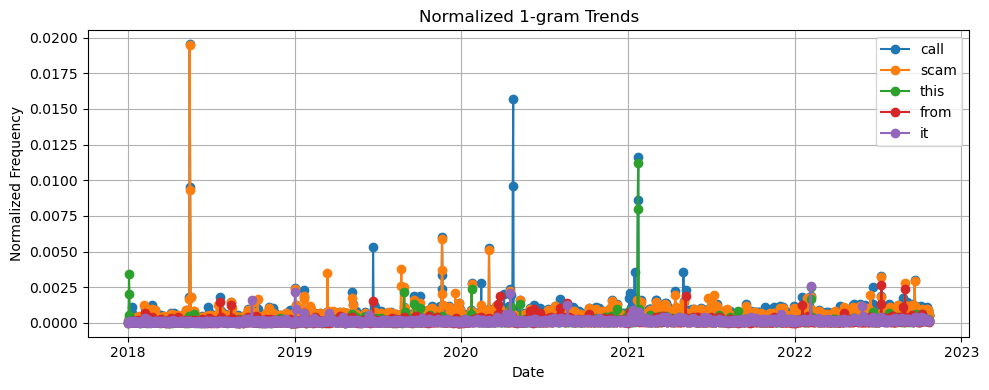

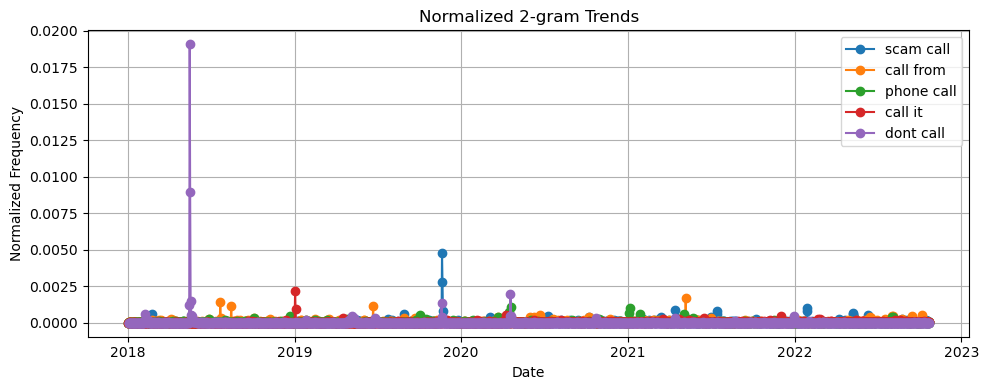

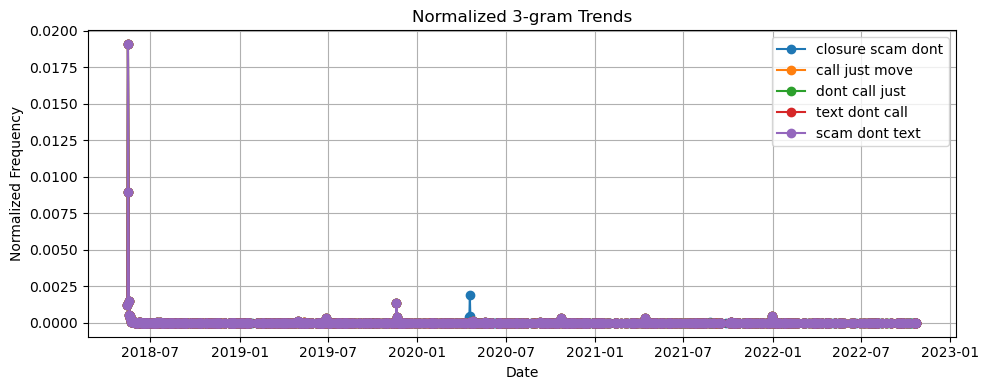

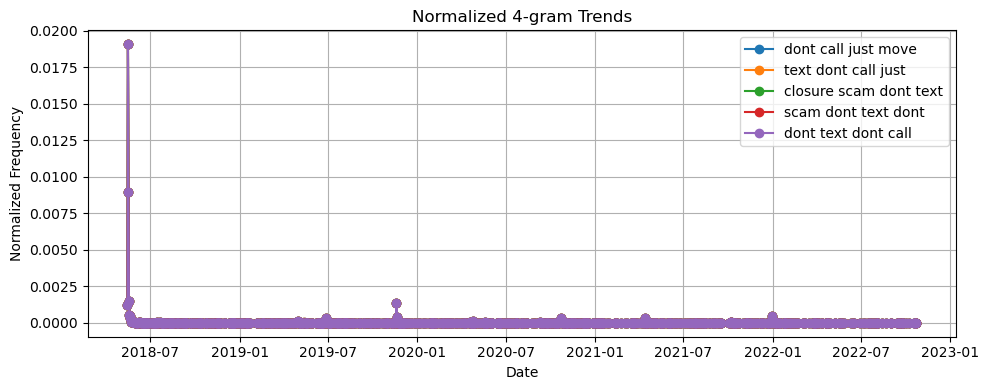

In [465]:
#time-series visualization

df['created_at'] = pd.to_datetime(df['created_at']).dt.date #format to date
total_users = df['author_id'].nunique() #find total number of unique users

def contains_ngram(tweet_words, ngram):
    """
    Check if a tweet_words, a list of words, contains specific ngrams.

    Parameters:
    tweet_words (list): A list of strings from a tweet.
    ngram (str): The ngram to search for.

    Returns:
    bool: True if the tweet contains the n-gram, False otherwise.
    """
    ngram_words = ngram.split()
    ngram_length = len(ngram_words)
    for i in range(len(tweet_words) - ngram_length + 1):
        if tweet_words[i:i + ngram_length] == ngram_words:
            return True  # ngram found
    return False

#one plot per ngram type
for n in range(1, 5):
    plt.figure(figsize=(10, 4))
    
    #get top 5 ngrams for current category
    ngrams_list = ngrams_generator(df['cleaned_text'], n)
    ngram_counts = Counter(ngrams_list)
    top_ngrams = [ngram for ngram, count in ngram_counts.most_common(5)]
    
    #plot each ngram's trend
    for ngram in top_ngrams:
        # count the daily posts with the ngram using lambda function
        daily_counts = df[df['cleaned_text'].apply(lambda x: contains_ngram(x, ngram))].groupby('created_at').size()
        normalized = daily_counts / total_users  # normalize by dividing by total users
        
        plt.plot(normalized, marker='o', label=ngram) #leave inside loop
    
    plt.title(f'Normalized {n}-gram Trends')
    plt.xlabel('Date')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Reflecting on the Process

This project was tricky, and I had to refer back to my notes and previous labs numerous times. At times, remembering everything we had learned from class and attempting to apply those skills to this assignment was challenging. However, instead of copying and pasting code from my notes, I tried to understand the code first, then tried to implement it into my project from memory. Although this meant that I spent more time on the project than expected because of this strategy, I absorbed the information and will be able to apply these new skills to the next project.

The first time I referred back to my notes was when I was making the ‘clean_text’ method. Understanding the format for the removal of hyperlinks and the mentions from the tweets inside the re.sub() function wasn’t very intuitive for me to remember.

I also struggled to make a word cloud for each user efficiently. The code initially took too long to run, so I decided to create a new sub-DataFrame that would only include tweets from the top ten users to speed up the run time. In the future, I will be sure to use this technique as it was effective in improving the performance of my code by running methods more quickly. After being able to run the code faster, I was able to use trial and error to fix a problem in my word cloud where I was getting phrases instead of one word.

When making the graph of sentiment scores over time, I had originally put all the top ten users in the same graph. I did this because it would be more useful visually to be able to compare trends on the same graph. After the graph was displayed, I decided it was too hard to distinguish any trends with ten different users on the same graph, so I split it back up into 10 graphs.

When printing the top n-grams, I had trouble formatting the print command. I kept getting random apostrophes and brackets in the output. To fix this, I created a method called ‘reclean_text’ that removed these unwanted characters. This approach worked effectively in cleaning up the ngram output.

The normalized time series visualization was the most difficult part of the assignment since I had no notes or labs to reference directly. This part of the assignment required a lot of experimentation and debugging. 

Overall, this assignment provided valuable experience in working with text data and applying data analysis techniques. I learned the importance of data preprocessing, efficient coding practices, and effective visualization techniques. I also gained a deeper understanding of the challenges involved in sentiment analysis and the importance of context in interpreting results. In the future, I will plan a map of what I want my code to do before I try to write it to give me a better pathway.